In [1]:
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
import requests

import pandas as pd
import os
import regex as re
import string
import numpy as np
import collections

import contractions
import spacy
#from spacy.tokenizer import Tokenizer
import en_core_web_sm
import nltk
#from nltk.stem import WordNetLemmatizer
from nltk import bigrams, trigrams
#from sklearn.base import TransformerMixin, BaseEstimator
#import sys

#I know this is silly, but whatever. People love it
from wordcloud import WordCloud

In [2]:
#https://hackernoon.com/scraping-amazon-product-information-with-python-and-beautifulsoup-yn4s3tgr
#https://martechwithme.com/schedule-python-scripts-windows-mac/
#https://www.dataquest.io/blog/web-scraping-python-using-beautiful-soup/
#headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

In [3]:
def get_paragraph_text(url, hdr):
    
    try:
        
        req = Request(url,headers=hdr)
        page = urlopen(req)
    
    except:
        
        print("http failed, trying https:")
        
        try:
            url = url.replace('http:', 'https:')
            req = Request(url,headers=hdr)
            page = urlopen(req)
        
        except Exception as e:
            print("substitution of https also failed. Error is {}".format(e))
            
    else:
   
        soup = BeautifulSoup(page, 'html.parser')

        p=soup.find_all('p')
        text = ' '.join(t.get_text() for t in p)

        return text
    

In [4]:

ah_url = 'https://a16z.com/crypto/'
#hdr = {'User-Agent': 'Mozilla/5.0'}
#hdr = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:97.0) Gecko/20100101 Firefox/97.0'}
       #(Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
    
    
hdr = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
       'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
       'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
       'Accept-Encoding': 'none',
       'Accept-Language': 'en-US,en;q=0.8',
       'Connection': 'keep-alive'}

# hdr = {'User-Agent':'Mozilla/5.0',
#         'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
#         'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
#         'Accept-Encoding': 'gzip, deflate, sdch',
#         'Accept-Language': 'en-US,en;q=0.8',
#         'Connection': 'keep-alive'}

req = Request(ah_url,headers=hdr)
page = urlopen(req)
soup = BeautifulSoup(page, 'html.parser')
#print(soup.prettify())

In [5]:
#get text from the main AH crypto landing site
main_site_text = get_paragraph_text(ah_url, hdr).lower()
print(main_site_text)

a new site for understanding the future, how tech shapes it, and how we build it. historically, new models of computing have tended to emerge every 10–15 years: mainframes in the 60s, pcs in the late 70s, the internet in the early 90s, and smartphones in the late 2000s. each computing model enabled new classes of applications that built on the unique strengths of the platform. for example, smartphones were the first truly personal computers with built-in sensors like gps and high-resolution cameras. applications like instagram, snapchat, and uber/lyft took advantage of these unique capabilities and are now used by billions of people. blockchain computers were first proposed in 2008 by satoshi nakamoto in the bitcoin whitepaper. those original ideas have since been dramatically expanded by developers and researchers around the world. blockchain computers are new types of computers where the unique capability is trust between users, developers, and the platform itself. this trust emerges

In [6]:
#get urls for content posts
content_sites = []
content_text = ''
for a in soup.find_all('a', class_="vertical-landing-post vertical-landing-post--no-image", href=True):
    content_sites.append(a['href'])
    
    content_text = content_text + ' ' + contractions.fix(get_paragraph_text(a['href'], hdr).lower())
    
    #content_text.append(get_paragraph_text(a['href'], hdr).lower())
    
    
print(content_sites)
print(content_text)

['https://a16z.com/2022/03/09/sleep-minting-nfts/', 'https://a16z.com/2022/03/03/investing-in-lido/', 'https://future.a16z.com/go-to-market-in-web3/', 'https://a16z.com/2022/01/07/how-to-build-a-better-internet-10-principles-for-world-leaders-shaping-the-future-of-web3/', 'https://a16z.com/2022/01/06/investing-in-goldfinch/', 'https://future.a16z.com/podcasts/crypto-at-congress-watershed-moment-for-regulation-and-web3/', 'https://a16z.com/2021/12/17/prediction-for-the-new-year-a-web3-midterm/', 'https://a16z.com/2021/12/06/investing-in-mysten-labs/']
 a new site for understanding the future, how tech shapes it, and how we build it. as an nft collector, you should care about on-chain provenance. the most authentic provenance for an nft is when it is initially minted directly from a creator’s wallet or a smart contract that the creator owns. however, with a few clever smart contract illusions, someone could manipulate nft provenance using a technique known as sleep minting. sleep minting

In [7]:
portfolio_divs = soup.find_all("div", {"class": "company company-type--crypto company--single-company"})

portfolio_websites = []
portfolio_text = ''
failed_websites = []

for tag in portfolio_divs:
    a_tags = tag.find_all("a", href=True)
    
    url = a_tags[0]['href']

    text = get_paragraph_text(url, hdr)
    
    if not isinstance(text, type(None)):
        
        #portfolio_text.append(get_paragraph_text(url, hdr).lower())
        
        portfolio_text = portfolio_text + ' ' + contractions.fix(get_paragraph_text(url, hdr).lower())
        
        portfolio_websites.append(url)
        
    else:
        failed_websites.append(url)




http failed, trying https:
substitution of https also failed. Error is HTTP Error 403: Forbidden
http failed, trying https:
substitution of https also failed. Error is HTTP Error 403: Forbidden
http failed, trying https:
substitution of https also failed. Error is HTTP Error 308: Permanent Redirect
http failed, trying https:


In [8]:
portfolio_websites

['https://www.alchemy.com/',
 'https://anchorage.com',
 'https://coinswitch.co/',
 'https://eco.com/',
 'https://forta.org/',
 'http://goldfinch.finance',
 'https://irreverentlabs.com',
 'http://www.manifold.co.nz',
 'https://near.org/',
 'https://opensea.io/',
 'https://solana.com/',
 'https://www.syndicateprotocol.org/',
 'http://Talos.com',
 'https://valoraapp.com/']

In [9]:
failed_websites

['http://aleo.org',
 'http://www.bitski.com',
 'https://element.fi',
 'http://foundation.app']

In [10]:
portfolio_text

" one magic line of code supercharges your development with the world’s most powerful blockchain developer platform, relied upon by the majority of the world's top blockchain apps. alchemy supernode is the most widely used blockchain api for ethereum, polygon, arbitrum, optimism, flow and crypto.org. get all the functionality of a node, including json-rpc support, but with the supercharged reliability, data correctness and scalability needed to run world-class applications on the blockchain. alchemy build is a no-configuration in-house suite of developer tools to prototype, debug, and ship products faster. instantly search through millions of historical requests, view real-time transactions in the mempool, make json-rpc calls directly from the dashboard, and quickly scan recent requests and errors. alchemy monitor is a comprehensive suite of dashboards and alerts for app health, performance, and user behavior. instantly check on the health of all your apps in one place, gain user insig

In [11]:
##If running for the first time
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')

nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# #fix some spacy lemma issues (e.g., "datum" and "scientist" not resulting in "science")
# nlp.get_pipe('lemmatizer').lookups.get_table("lemma_exc")["noun"]["data"] = ["data"]
# nlp.get_pipe('lemmatizer').lookups.get_table("lemma_exc")["noun"]["scientist"] = ["science"]
# nlp.get_pipe('lemmatizer').lookups.get_table("lemma_exc")["noun"]["artificial intelligence"] = ["ai"]


#change/include additional stop words
customize_stop_words = {'not':False, 
                        '\n\n':True, 
                        '\n\n\n':True}


for w,val in customize_stop_words.items():
    nlp.vocab[w].is_stop = val

In [12]:
#https://www.kaggle.com/balatmak/text-preprocessing-steps-and-universal-pipeline

class TextPreprocessor(object):
    def __init__(self):
        """
        TBD
        """

    def preprocess_df(self, df):
        return df.apply(self._preprocess_text)

    def preprocess_text(self, text):
        doc = nlp(text)
        removed_punct = self._remove_punct(doc)
        removed_stop_words = self._remove_stop_words(removed_punct)

        return self._lemmatize(removed_stop_words)

    def _remove_punct(self, doc):
        return [t for t in doc if t.text not in string.punctuation]

    def _remove_stop_words(self, doc):
        return [t for t in doc if not t.is_stop]

    def _lemmatize(self, doc):
        
        lemma_text = ' '.join([t.lemma_ for t in doc])
        
        return re.sub('\s+',' ',lemma_text)
        
        

In [13]:
#main_site_text = contractions.fix(main_site_text)

#content_text = ' '.join(content_text)


In [14]:
ah_text = main_site_text + ' ' + content_text
ah_text = TextPreprocessor().preprocess_text(ah_text)

portfolio_text = TextPreprocessor().preprocess_text(portfolio_text)

In [15]:
# content_text = ' '.join(content_text)

In [16]:
word_counts = collections.Counter(ah_text.split())
bg = bigrams(ah_text.split())
bigram_counts = collections.Counter(bg)
tg = trigrams(ah_text.split())
trigram_counts = collections.Counter(tg)

word_counts.most_common(50)

[('not', 104),
 ('investment', 79),
 ('"', 76),
 ('web3', 74),
 ('a16z', 68),
 ('—', 55),
 ('nft', 53),
 ('community', 44),
 ('protocol', 41),
 ('new', 40),
 ('fund', 40),
 ('token', 38),
 ('purpose', 38),
 ('company', 36),
 ('crypto', 35),
 ('provide', 35),
 ('build', 34),
 ('user', 34),
 ('market', 32),
 ('content', 31),
 ('asset', 31),
 ('manage', 29),
 ('future', 28),
 ('network', 28),
 ('service', 27),
 ('information', 27),
 ('project', 27),
 ('include', 26),
 ('web2', 25),
 ('digital', 24),
 ('decentralize', 24),
 ('product', 24),
 ('model', 23),
 ('example', 23),
 ('team', 23),
 ('make', 23),
 ('customer', 23),
 ('blockchain', 20),
 ('create', 20),
 ('business', 20),
 ('organization', 20),
 ('layer', 20),
 ('developer', 19),
 ('source', 19),
 ('traditional', 19),
 ('result', 19),
 ('stake', 18),
 ('use', 18),
 ('game', 17),
 ('lead', 17)]

In [17]:
bigram_counts.most_common(50)

[(('manage', 'a16z'), 20),
 (('fund', 'manage'), 19),
 (('digital', 'asset'), 19),
 (('portfolio', 'company'), 14),
 (('purpose', 'not'), 13),
 (('provide', 'informational'), 11),
 (('informational', 'purpose'), 11),
 (('not', 'rely'), 11),
 (('rely', 'make'), 11),
 (('andreessen', 'horowitz'), 10),
 (('check', 'inbox'), 10),
 (('inbox', 'welcome'), 10),
 (('welcome', 'note'), 10),
 (('a16z', 'not'), 10),
 (('opinion', 'express'), 10),
 (('list', 'investment'), 9),
 (('layer', '1'), 9),
 (('layer', '2'), 9),
 (('investment', 'vehicle'), 8),
 (('publicly', 'trade'), 8),
 (('smart', 'contract'), 8),
 (('sleep', 'mint'), 8),
 (('new', 'site'), 7),
 (('site', 'understand'), 7),
 (('understand', 'future'), 7),
 (('future', 'tech'), 7),
 (('tech', 'shape'), 7),
 (('shape', 'build'), 7),
 (('a16z', 'crypto'), 7),
 (('investment', 'portfolio'), 7),
 (('company', 'mention'), 7),
 (('mention', 'refer'), 7),
 (('refer', 'describe'), 7),
 (('not', 'representative'), 7),
 (('representative', 'inves

In [18]:
trigram_counts.most_common(50)

[(('fund', 'manage', 'a16z'), 13),
 (('provide', 'informational', 'purpose'), 11),
 (('check', 'inbox', 'welcome'), 10),
 (('inbox', 'welcome', 'note'), 10),
 (('new', 'site', 'understand'), 7),
 (('site', 'understand', 'future'), 7),
 (('understand', 'future', 'tech'), 7),
 (('future', 'tech', 'shape'), 7),
 (('tech', 'shape', 'build'), 7),
 (('investment', 'portfolio', 'company'), 7),
 (('portfolio', 'company', 'mention'), 7),
 (('company', 'mention', 'refer'), 7),
 (('mention', 'refer', 'describe'), 7),
 (('not', 'representative', 'investment'), 7),
 (('representative', 'investment', 'vehicle'), 7),
 (('investment', 'vehicle', 'manage'), 7),
 (('vehicle', 'manage', 'a16z'), 7),
 (('manage', 'a16z', 'assurance'), 7),
 (('a16z', 'assurance', 'investment'), 7),
 (('assurance', 'investment', 'profitable'), 7),
 (('investment', 'profitable', 'investment'), 7),
 (('profitable', 'investment', 'future'), 7),
 (('investment', 'future', 'similar'), 7),
 (('future', 'similar', 'characteristic'

In [19]:
word_counts = collections.Counter(portfolio_text.split())
bg = bigrams(portfolio_text.split())
bigram_counts = collections.Counter(bg)
tg = trigrams(portfolio_text.split())
trigram_counts = collections.Counter(tg)

word_counts.most_common(50)

[('asset', 32),
 ('anchorage', 32),
 ('"', 28),
 ('crypto', 27),
 ('digital', 22),
 ('blockchain', 20),
 ('—', 18),
 ('live', 18),
 ('world', 17),
 ('not', 16),
 ('platform', 15),
 ('access', 14),
 ('capital', 14),
 ('security', 13),
 ('build', 12),
 ('nft', 12),
 ('custody', 11),
 ('trading', 11),
 ('provide', 11),
 ('support', 10),
 ('community', 10),
 ('game', 10),
 ('ecosystem', 10),
 ('developer', 9),
 ('risk', 9),
 ('bank', 9),
 ('partner', 9),
 ('people', 9),
 ('create', 9),
 ('celo', 9),
 ('alchemy', 8),
 ('user', 8),
 ('new', 8),
 ('learn', 8),
 ('set', 8),
 ('network', 8),
 ('wallet', 8),
 ('valora', 8),
 ('app', 7),
 ('include', 7),
 ('class', 7),
 ('good', 7),
 ('advanced', 7),
 ('easy', 7),
 ('service', 7),
 ('market', 7),
 ('team', 7),
 ('decentralize', 7),
 ('technology', 7),
 ('grow', 7)]

In [20]:
bigram_counts.most_common(50)

[(('digital', 'asset'), 18),
 (('"', '—'), 11),
 (('"', 'anchorage'), 8),
 (('crypto', 'custody'), 6),
 (('capital', '"'), 6),
 (('exclusive', 'access'), 6),
 (('developer', 'tool'), 4),
 (('world', 'class'), 3),
 (('real', 'time'), 3),
 (('custody', 'trading'), 3),
 (('staking', 'governance'), 3),
 (('anchorage', 'digital'), 3),
 (('digital', 'bank'), 3),
 (('founder', 'ceo'), 3),
 (('asset', '"'), 3),
 (('—', 'kevin'), 3),
 (('anchorage', 'not'), 3),
 (('smart', 'contract'), 3),
 (('machine', 'learning'), 3),
 (('live', 'genesis'), 3),
 (('genesis', 'drop'), 3),
 (('drop', 'unlock'), 3),
 (('unlock', 'exclusive'), 3),
 (('access', 'iconic'), 3),
 (('iconic', 'image'), 3),
 (('image', 'ecosystem'), 3),
 (('ecosystem', 'live'), 3),
 (('live', 'isoteric'), 3),
 (('isoteric', 'trashhand'), 3),
 (('trashhand', 'live'), 3),
 (('live', 'amc'), 3),
 (('amc', 'walk'), 3),
 (('walk', 'dead'), 3),
 (('dead', 'nft'), 3),
 (('nft', 'exclusive'), 3),
 (('access', 'pass'), 3),
 (('level', 'efficien

In [21]:
trigram_counts.most_common(50)

[(('capital', '"', 'anchorage'), 4),
 (('crypto', 'custody', 'trading'), 3),
 (('anchorage', 'digital', 'bank'), 3),
 (('asset', '"', '—'), 3),
 (('"', '—', 'kevin'), 3),
 (('live', 'genesis', 'drop'), 3),
 (('genesis', 'drop', 'unlock'), 3),
 (('drop', 'unlock', 'exclusive'), 3),
 (('unlock', 'exclusive', 'access'), 3),
 (('exclusive', 'access', 'iconic'), 3),
 (('access', 'iconic', 'image'), 3),
 (('iconic', 'image', 'ecosystem'), 3),
 (('image', 'ecosystem', 'live'), 3),
 (('ecosystem', 'live', 'isoteric'), 3),
 (('live', 'isoteric', 'trashhand'), 3),
 (('isoteric', 'trashhand', 'live'), 3),
 (('trashhand', 'live', 'amc'), 3),
 (('live', 'amc', 'walk'), 3),
 (('amc', 'walk', 'dead'), 3),
 (('walk', 'dead', 'nft'), 3),
 (('dead', 'nft', 'exclusive'), 3),
 (('nft', 'exclusive', 'access'), 3),
 (('exclusive', 'access', 'pass'), 3),
 (('level', 'efficiency', 'transparency'), 3),
 (('efficiency', 'transparency', 'risk'), 3),
 (('transparency', 'risk', 'mitigation'), 3),
 (('alchemy', 'co

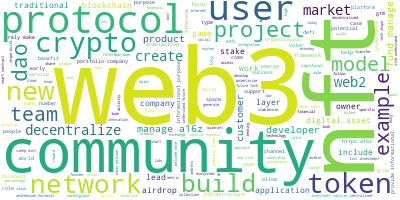

In [22]:
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')# Generate a word cloud
wordcloud.generate(ah_text)# Visualize the word cloud
wordcloud.to_image()

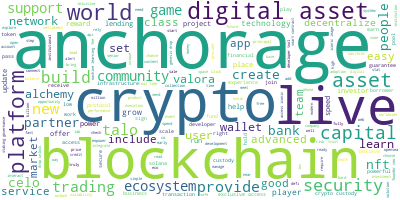

In [23]:
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')# Generate a word cloud
wordcloud.generate(portfolio_text)# Visualize the word cloud
wordcloud.to_image()